In [5]:
import import_ipynb
import Neural_Net as nn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math

In [4]:
from tensorflow.contrib.learn.python.learn.estimators._sklearn import train_test_split

# load the dataset
X, Y = nn.load_data()
# split into train and test sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.30, random_state=1)

In [6]:
# prepare input data
xtrain_enc, xtest_enc = nn.prepare_inputs(xtrain, xtest)
# prepare output data
ytrain_enc, ytest_enc = nn.prepare_targets(ytrain, ytest)

c:\users\plus sys\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  


In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

from sklearn.metrics import confusion_matrix

classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=200)
classifier.fit(xtrain_enc, ytrain_enc)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

            predicted cancer  predicted no cancer
has cancer                10                   15
no cancer                 13                   48

Accuracy: 0.6744186046511628 



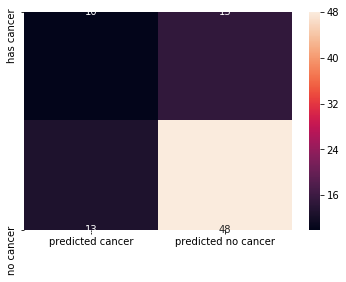

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix 

y_pred = classifier.predict(xtest_enc)
cm = np.array(confusion_matrix(ytest_enc,y_pred, labels =[1,0]))

confusion = pd.DataFrame(cm, index = ['has cancer','no cancer'], columns= ['predicted cancer', 'predicted no cancer'])
print(confusion)
sns.heatmap(confusion, annot = True)
    
print("\nAccuracy:",metrics.accuracy_score(ytest_enc, y_pred),"\n")